In [1]:
import pandas as pd

In [2]:
path = 'C:/Users/Benedito/Desktop/teste/'

In [3]:
colunas = [(0,2), (2, 10), (10, 12), (12,24), (24,27), (27, 39), (39, 49), (49,52), (52, 56), (56, 69), (69,82), (82,95), (95, 108),
          (108, 121), (121,134), (134,147), (147,152), (152, 170), (170, 188), (188, 201), (201, 202), (202, 210), (210, 217), (217, 230),
          (230, 242), (242, 245)]
df = pd.read_fwf(path+'2019.txt', colspecs = colunas)


In [4]:

df.columns = ['tipreg', 'dtref', 'codbdi','codneg','tpmerc','nomres','especi', 'prazot', 'modref','preabe', 'premax','premin', 'premed',
             'preult','preofc','preofv','totneg','quatot','voltot','preexe','indopc','datven','fatcot','ptoexe','codisi','dismes']


df['tipreg'] = pd.Series(df['tipreg'].apply(str)).str.pad(width=2, side='left', fillchar='0')
df['codbdi'] = pd.Series(df['codbdi'].astype(int).apply(str)).str.pad(width=2, side='left', fillchar='0') ##tava lendo como double
df['codneg'] = pd.Series(df['codneg'].apply(str)).str.pad(width=12, side='left', fillchar='0')
df['tpmerc'] = pd.Series(df['tpmerc'].apply(str)).str.pad(width=3, side='left', fillchar='0')
df['prazot'] = pd.Series(df['prazot'].apply(str)).str.pad(width=3, side='left', fillchar='0')
df['ptoexe'] = pd.Series(df['ptoexe'].apply(str)).str.slice(start=0, stop=7, step = 1)#+'.'+pd.Series(df['ptoexe'].apply(str)).str.slice(start=7, stop=13, step = 1).replace(r'.0','')#.apply(pd.to_numeric)


df['preabe'] = df['preabe']/100
df['premax'] = df['premax']/100
df['premin'] = df['premin']/100
df['premed'] = df['premed']/100
df['preult'] = df['preult']/100
df['preofc'] = df['preofc']/100
df['preofv'] = df['preofv']/100
df['voltot'] = df['voltot']/100
df['preexe'] = df['preexe']/100




In [5]:
df.head()

,tipreg,dtref,codbdi,codneg,tpmerc,nomres,especi,prazot,modref,preabe,...,totneg,quatot,voltot,preexe,indopc,datven,fatcot,ptoexe,codisi,dismes
0,01,20190102,02,0000000AALR3,010,ALLIAR,ON NM,nan,R$,13.31,...,856.0,264200.0,3523962.0,0.0,0.0,99991231.0,1.0,0.0,BRAALRACNOR6,100.0
1,01,20190102,02,000000AAPL34,010,APPLE,DRN,nan,R$,60.71,...,45.0,16800.0,1015969.0,0.0,0.0,99991231.0,1.0,0.0,BRAAPLBDR004,127.0
2,01,20190102,02,000000ABBV34,010,ABBVIE,DRN,nan,R$,342.84,...,1.0,300.0,102852.0,0.0,0.0,99991231.0,1.0,0.0,BRABBVBDR001,111.0
3,01,20190102,02,0000000ABCB4,010,ABC BRASIL,PN EJS N2,nan,R$,16.47,...,3477.0,571700.0,9598300.0,0.0,0.0,99991231.0,1.0,0.0,BRABCBACNPR4,131.0
4,01,20190102,02,0000000ABEV3,010,AMBEV S/A,ON EJ,nan,R$,15.40,...,45941.0,18692900.0,298201954.0,0.0,0.0,99991231.0,1.0,0.0,BRABEVACNOR1,121.0


In [6]:
df = df[:-1] ###arrancando a linha do rodapé

###criando uma data ref no formato data para fazer uns plots

df['data_ref'] = pd.Series(df['dtref'].apply(str)).str.slice(start=0, stop=4, step = 1)+'-'+pd.Series(df['dtref'].apply(str)).str.slice(start=4, stop=6, step = 1)+'-'+pd.Series(df['dtref'].apply(str)).str.slice(start=6, stop=8, step = 1)
df['data_ref'] = pd.to_datetime(df['data_ref'])




In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 5)})
df = df.set_index('data_ref') ##indexa o dataframe na data do pregao

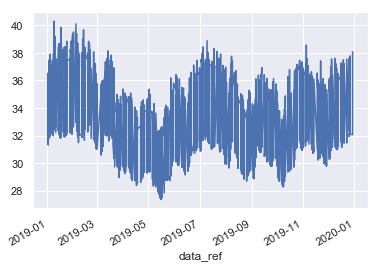

In [8]:

df[(df['nomres']=='ITAUUNIBANCO')]['premed'].plot(kind = 'line')

In [9]:
a = pd.DataFrame(df[df['nomres']=='KLABIN S/A']['premed'])
b = pd.DataFrame(df[df['nomres']=='COPEL']['premed'])
c = pd.DataFrame(df[df['nomres']=='FACEBOOK']['premed'])

a.columns = ['a']
b.columns = ['b']
c.columns = ['c']
df2 = a.join(b).join(c)
df2.head()

,a,b,c
data_ref,,,
2019-01-02,4.55,30.15,259.52
2019-01-02,4.55,30.15,260.84
2019-01-02,4.55,30.98,259.52
2019-01-02,4.55,30.98,260.84
2019-01-02,4.55,30.10,259.52


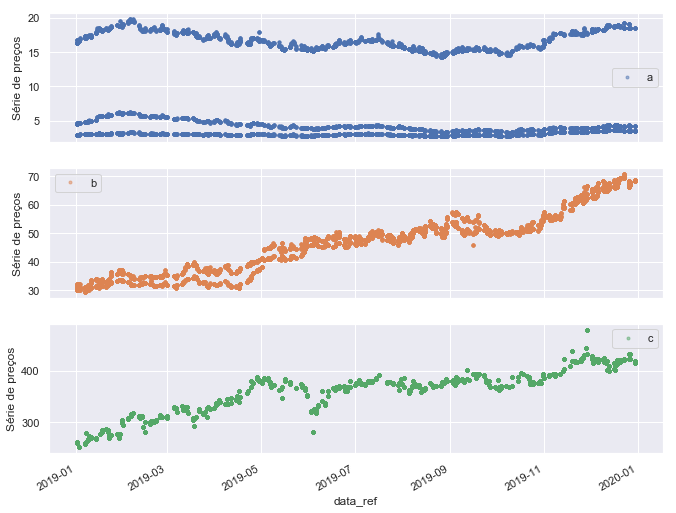

In [10]:
cols_plot = ['a', 'b', 'c']

axes = df2[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Série de preços')
